<a href="https://colab.research.google.com/github/hssitja/PhD-Dissertation/blob/Chapter-1/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt

Brazilian labour market simulation

A *Person* must decide an occupation (d_t) for each time (t = 0, 1, ..., T) where:

d_t = 0 -> unemployed; 
d_t = 1 -> working in the private sector; 
d_t = 2 -> working as civil servant; 
d_t = 3 -> retired.



In [51]:
class Person(object):
    """
    Represents a young person.

    At all times the person has a particular skill level and discount factor.
    
    """
    def __init__(self, name, skill, discount, age, lifeExp, occupation, basicIncome,
                 privateIncome, publicIncome, wealth, probPriv, probPub,
                 probLose, time):
        """
        Initializes a Person with the given skill at t=0.

        skill: at t=0, a random variable lognormally distributed ~ (0.01, 0.3).
        discount: float between (0,1)
        age: a positive integer representing months.
        lifeExp: a positive integer.
        occupation: student, privateEmployee, civilServant or retiree.
        incomes: positive integers.
        wealth: positive integer.
        probs: floats between (0,1)
        """
        
        self.name = name
        self.skill = skill
        self.discount = discount
        self.age = age
        self.lifeExp = np.random.normal(lifeExp, lifeExp/10)
        self.discount = 1
        self.time = time
        self.occupation = occupation
        self.basicIncome = basicIncome
        self.privateIncome = privateIncome
        self.publicIncome = publicIncome
        self.wealth = wealth
        self.probPriv = probPriv
        self.probPub = probPub
        self.probLose = probLose
        # self.income = income

    def __repr__(self)    :
        """
        Return string with person name
        -------
        
        """
        return self.name

    def getSkill(self):
        """
        Return the skill level of a person.
        
        returns: a float corresponding to the skill level at each time t.
        """
        return self.skill
    
    def getdiscount(self):
        """
        Return the discount factor of a person.
        
        returns: a float between (0,1).
        """
        return self.discount
    
    def getAge(self):
        """
        Return the age of the person.
        
        returns: an integer corresponding to the age in months at each time t.
        """
        return int(self.age)
    
    def getLifeExp(self):
        """
        Return the life expectancy.

        returns: a positive float.
        """
        return self.lifeExp
    
    def getOccupation(self):
        """
        Return current ocupation.

        returns: either 'student', 'privateEmployee', 'civilServant',
            'retiree' or 'welfare'.
        """
        return self.occupation
    
    def getBasicIncome(self):
        """
        Return the basic income.

        returns: a positive float or integer.
        """
        return self.basicIncome
    
    def getPrivateIncome(self):
        """
        Return the private income.

        returns: a positive float or integer.
        """
        return self.privateIncome
    
    def getPublicIncome(self):
        """
        Return the public income.

        returns: a positive float or integer.
        """
        return self.publicIncome
    
    def getWealth(self):
        """
        Return the person's wealth.

        returns: a positive float or integer.
        """
        return self.wealth

    def getProbPriv(self):
        """
        Return the person's probability of getting a job.

        returns: a positive float < 1.
        """
        return self.probPriv

    def getProbPub(self):
        """
        Return the person's probability of getting a position in the public service.

        returns: a positive float < 1.
        """
        return self.probPub
    
    def getProbLose(self):
        """
        Return the person's probability of losing their current job.

        returns: a positive float < 1.
        """
        return self.probLose

    def updateSkill(self):
        """
        Set the skill for time t.
        
        return: a positive float.
            
        """
        occupation = self.getOccupation()
        
        if occupation == 'student':
            return self.getSkill()*1.0005 # valores arbitrários!
        elif occupation == 'privateEmployee' or 'civilServant':
            return self.getSkill() * 1.00025 # valores arbitrários!
        else:
            return self.getSkill() * 0.999 # valores arbitrários!

    def updateOccupation(self, goal):
        """
        Set the occupation for time t.
            
        When t=0, occupation == 'student'

        occupation: either 'student', 'privateEmployee', 'civilServant', or
            'retiree'
                
        """
        self.goal = goal
        
        keepJob, getJob     = np.random.random(), np.random.random()
        occupation          = self.getOccupation()
        probPriv            = self.getProbPriv()
        probPub             = self.getProbPub()
        probLose            = self.getProbLose()
        
        if goal == 'privateEmployee':
            if occupation == 'student' and getJob < probPriv:
                return 'privateEmployee'
            elif occupation == 'privateEmployee' and keepJob > probLose:
                return occupation
            else:
                return 'student'
        
        elif goal == 'civilServant':
            if occupation == 'student' and getJob < probPub:
                return 'civilServant'
            elif occupation == 'civilServant':
                return occupation
            else:
                return 'student'

    def updatePerson(self, goal):
        """
        Simulate the passage of a single time-step.
        
        """
        self.goal       = goal
        name            = self.name
        lifeExp         = self.getLifeExp()
        time            = self.time + 1        
        age             = self.getAge() + 1/12        
        skill           = self.getSkill()
        discount          = self.getdiscount()
        wealth          = self.getWealth()
        basicIncome     = self.getBasicIncome()
        privateIncome   = self.getPrivateIncome()*(1 + skill/100)
        publicIncome    = self.getPublicIncome()*(1 + skill/100)
        occupation      = self.getOccupation()
        
        if occupation == 'privateEmployee':
            wealth += privateIncome
        elif occupation == 'civilServant':
            wealth += publicIncome
        else:
            wealth += basicIncome        
                
        skill       = self.updateSkill()
        occupation  = self.updateOccupation(goal)
        probPriv    = self.getProbPriv()
        probPub     = self.getProbPub()
        probLose    = self.getProbLose()       
            
        return Person(name, skill, discount, age, lifeExp, occupation, basicIncome, privateIncome, 
                      publicIncome, wealth, probPriv, probPub, probLose, time)

Simulation with exogenous career choice

In [57]:
# Defining a function to simulate and plot the results

def simulation(privateEmployee, civilServant, steps):
                       
    """
    Runs simulations and plots graph

    steps: number of time steps in the simulation
    
    """
    
    privateEmployeeWealth   = []
    civilServantWealth      = []
    # privateEmployeeAge      = []
    # civilServantAge         = []
        
    age = 18    
    ageList = []
        
    t = 0
    while t < steps:
        privateEmployee = privateEmployee.updatePerson('privateEmployee')
        privateEmployeeWealth.append(privateEmployee.getWealth())
        # privateEmployeeAge.append(privateEmployee.getAge())
        
        civilServant = civilServant.updatePerson('civilServant')
        civilServantWealth.append(civilServant.getWealth())
        # civilServantAge.append(civilServant.getAge())
        
        age += 1/12
        ageList.append(age)
        
        t +=1
    
    
    # privateEmployeeAge = np.array(privateEmployeeAge)
    # civilServantAge = np.array(civilServantAge)
    
    privateEmployeeWealth = np.array(privateEmployeeWealth)
    civilServantWealth = np.array(civilServantWealth)
    ageList = np.array(ageList)
    
    fig, ax = plt.subplots()
    
    # Plot lines
    ax.plot(ageList, privateEmployeeWealth, color="green")
    ax.plot(ageList, civilServantWealth, color="red")
    
    
    # Fill area with green
    ax.fill_between(
        ageList, privateEmployeeWealth, civilServantWealth, 
        where=(privateEmployeeWealth > civilServantWealth), 
        interpolate=True, color="green", alpha=0.25, 
        label="Total private income is superior"
    )
    
    # Fill area with red
    ax.fill_between(
        ageList, privateEmployeeWealth, civilServantWealth, 
        where=(privateEmployeeWealth < civilServantWealth), 
        interpolate=True, color="red", alpha=0.25, 
        label="Total public income is superior"
    )
    
    ax.legend();

In [56]:
# creating two instances of class Person

(skill, discount, age, lifeExp, occupation, basicIncome, privateIncome,\
 publicIncome, wealth, probPriv, probPub, probLose, time) = \
 (1, 1, 18, 80, 'student', 100, 200, 200, 0, 0.2, .01, .01, 0)


john = Person('John', skill, discount, age, lifeExp, occupation, basicIncome,\
              privateIncome, publicIncome, wealth, probPriv, probPub, probLose, time)
mary = Person('Mary', skill, discount, age, lifeExp, occupation, basicIncome,\
              privateIncome, publicIncome, wealth, probPriv, probPub, probLose, time)

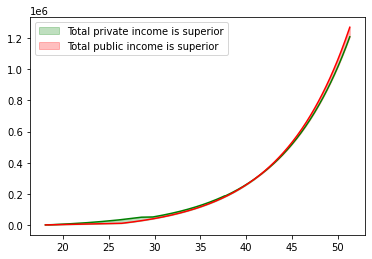

In [66]:
# perform a simulation with 'steps' time

steps = 400

simulation(john, mary, steps)